# Machine Learning Example 1: Linear Regression

## Project Introduction

This project is an example of a linear regression data science model. This analysis will focus on an ecommerce company in New York City that sells clothing online primarily, but also offer in-store styling and clothing sessions. The costumers that come into the store have meetings with the stylist and then can order their purchases through the mobile shopping interface or through the company website. This sample dataset was provided by Pierian Data.

This example will simulate a real world issue that many companies face. With the cost of marketing increasing, should this ecommerce company focus their efforts on the mobile app experience or the website? Futhermore, what information can you gather about how much the costumer's overall spending habits?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Processing

In [2]:
customer = pd.read_csv('Ecommerce Customers')

In [3]:
customer.head()
#This looks at the first 5 rows of the dataset

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customer.info()
#This gives more information about the columns like data type, number of observations etc.
customer.describe()
#This gives basic statistical information about the numeric variables. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customer['Email'].nunique()
#This shows that the each customer (using Email as the identifier) only shows up once in the dataset.

500

For this example, this dataset was clean and ready for data analysis. Many datasets will need further cleaning using the pandas data processing library. For now, we can start to dive deeper into this ecommerce dataset. This dataset has 500 observations for each of its 8 columns. 'Email', 'Address' and 'Avatar' are the identification variables for this dataset; these serve as the only qualitative variables in the data. 

'Average Session Length' gives the average amount of time engaging with the company in any way, 'Time on App' details the total amount of hours spent on the mobile app, 'Time on Website' details the total hours spent on the website, 'Length of Membership' gives the total number of years that they were a member with this company and 'Yearly Amount Spent' shows yearly total of hours spent engaging with the company.

Since we have data about length of membership of multiple years AND average session length overall, we can safely assume that this data only represents a smaller portion of a larger sample. More contact directly with the company may be useful here in order to better understand the overall data landscape. For now, we will continue to work with this portion of the total data.

For this experiment, we will primarily be predicting on 'Total Amount Spent' or our response variable. The independent variables will be 'Time on Website', 'Time on App', 'Length of Membership', and 'Avg. Session Length'.

## Exploratory Data Analysis

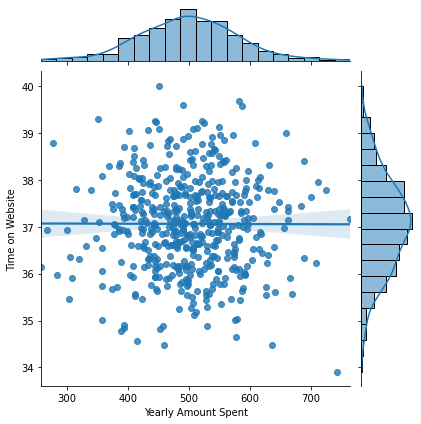

In [6]:
sns.jointplot(x='Yearly Amount Spent',y='Time on Website',data=customer,kind='reg')

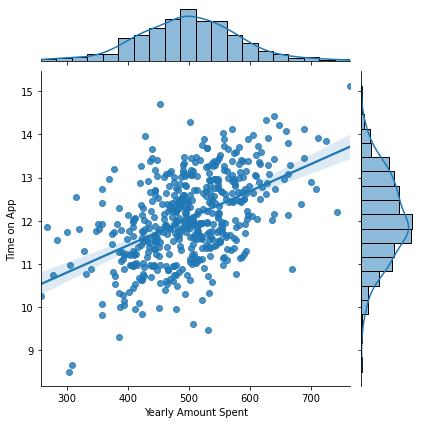

In [7]:
sns.jointplot(x='Yearly Amount Spent',y='Time on App',data=customer,kind='reg')

These first two visuals are best way to quickly visualize some of the key variables for this company's analysis: time engaging with either the website or the mobile app. 

The first visual shows a nearly horizontal slope line. This indicates that time spent on the website and total amount spent are not really that related or correlated with each other. The second visual shows a more promising finding. Initial analysis seems to suggest that there is a positive relationship or correlation between time engaged on the mobile app and total amount spent. With this information, we can continue to explore the other predictor variables as they interact with our response variable.

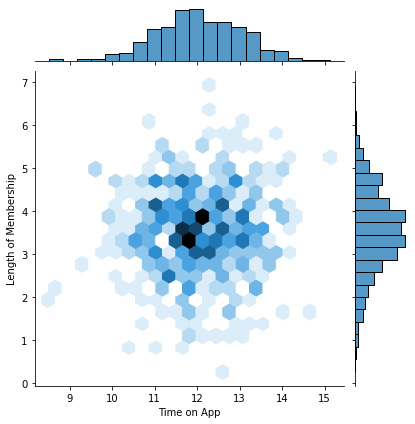

In [8]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customer,kind='hex')

Since 'Time on App' seemed to be a good predictor for amount spent, 'Length of Membership' was visualized with the variable to check for any other correlation. Based on this chart, there does not seem to be any sort of relationship between the time spent engaging with the mobile app and the total length of membership at this company.

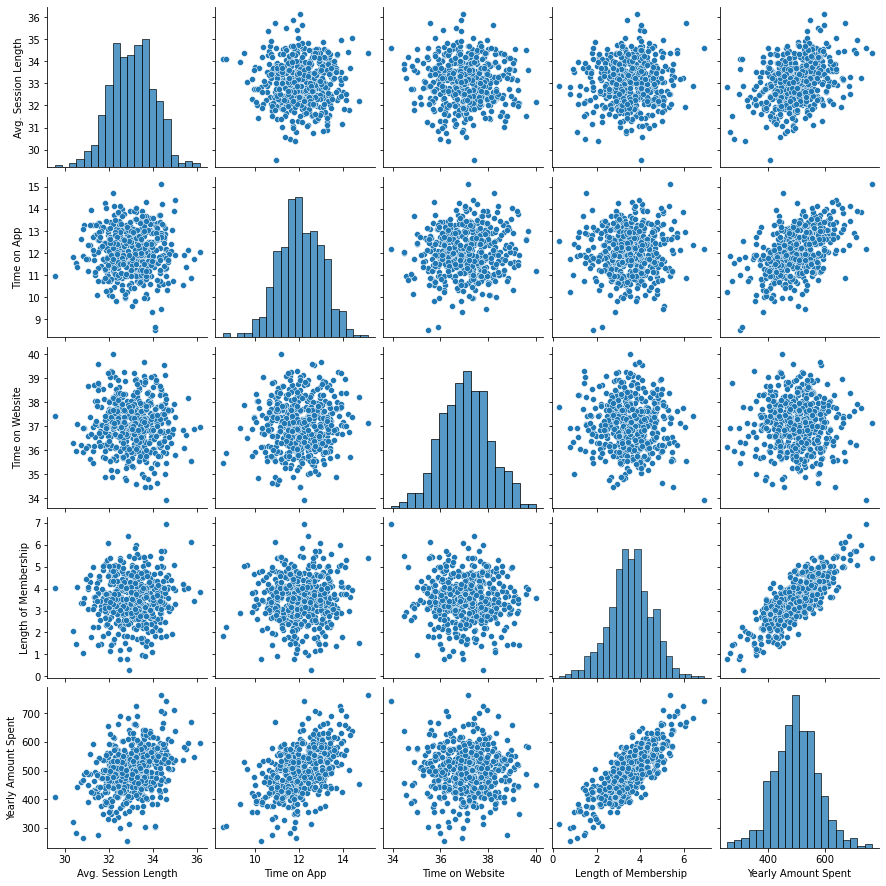

In [9]:
sns.pairplot(customer)

<AxesSubplot:>

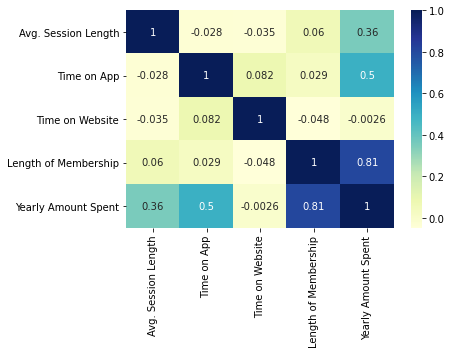

In [10]:
sns.heatmap(customer.corr(),annot=True, cmap="YlGnBu")

Both sets of visuals above are extremely useful in the data exploratory phase. The pairplot function creates the best visualization for each pairing of the quanitative variables. There will either be scatterplots or histograms based on the specific data interaction. For instances where the variables are being compared to themselves, a histogram will appear. For all other instances, a scatterplot will be created to show the general spread of the two data points.

The heatmap shows similar information in that it focuses on the interaction between each variable and color each square based on the correlation coefficient of each variable. 

Both sets of visualizations show that total amount spent seems to be most strongly correlated with length of membership. Since the correlation coefficient scores between a -1 to 1 (1 meaning perfect positive relationship and -1 meaning perfect negative relationship), these variables have a score of .81, which indicated a strong, positive relationship. We see once again that time spent on website and amount spent do not seem to be correlated. Time on app, however, shows a moderate, positive relationship with total amount spent.

The following two visualizations focus only on the two predictor variables that seem to have the most strong relationship with amount spent.

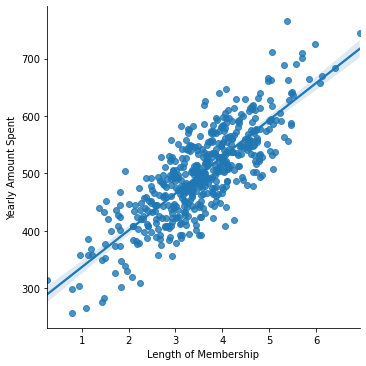

In [11]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=customer)

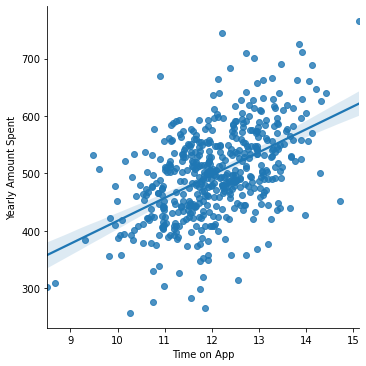

In [12]:
sns.lmplot(x="Time on App", y="Yearly Amount Spent", data=customer)

## Training and Testing Data

In [13]:
customer.columns
#Gives an index of all of the columns in the dataset

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
X = customer[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
#create list of predictor variables

In [15]:
y = customer['Yearly Amount Spent']
#creates the response variable

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101) 
#This uses tuple unpacking to create test and training datasets for the experiment
#Test_size is the amount of data that you are using to create the splits 40% of data, 33% of data, etc.

## Training the Model

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [18]:
lm.fit(X_train, y_train)
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


After spliting and training our sample, we can focus on fitting our model. The coefficients above show just how much the response variable or amount spent is actually affected our predictor variables. For every one unit increase in our independent variables, our dependent variable increase by the amount of the coefficient. For example, for every one unit increase in length of membership, we can expect an increase of 61$. Again we see the same patterns-- time on app and length of membership show to move our dependent variable the most. 

## Predicting Test Data

In [19]:
predictions =lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

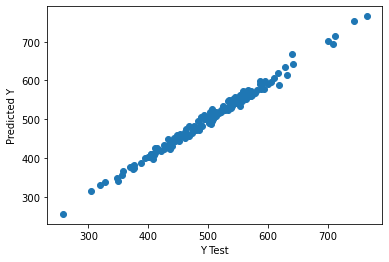

In [26]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

The scatterplot above shows the REAL test values versus what our PREDICTED model values. This shows us that our model worked very well and we can be confident in the results. Even though we can use this help us visualize the difference between our real and predicted values, further more statisical methods can be used to evaluate the efficency of our model.

## Evaluating the Model

In [35]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Total Spent Avg.:',customer['Yearly Amount Spent'].mean())
print('R^2 Score:',metrics.explained_variance_score(y_test, predictions))

MAE: 7.228148653430838
MSE: 79.81305165097451
RMSE: 8.933815066978637
Total Spent Avg.: 499.314038258591
R^2 Score: 0.9890771231889607


Based on the mean absoluate error, mean squared error and root means squared error (most important statistic here), we can feel confident in our model. We can compare the the average of amount spent (almost 500 dollars) to the root means squared error to better understand the error of our model. We are only seeing an error of about 8.9338 units of our response variable or about 9 dollars. The R Squared Score shows the amount of variance that our model actually explains. We see that we are explaining about 99% of the variance which futher increases our confidence in this model.

## Residuals

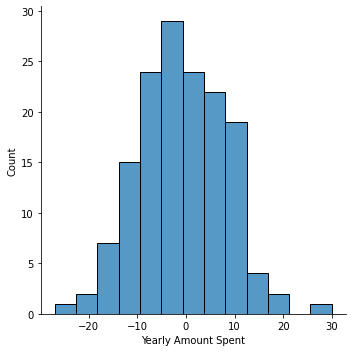

In [36]:
sns.displot((y_test-predictions)) 

Based on on residuals (the difference between the REAL values and our PREDICTED values), we can see that the values are normally distributed. This is another indication that we picked a good model for our sample of data. If the data were not distrubted normally, we would need to revise our experiment.

## Conclusion

In [37]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [38]:
customer.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Orginally the company wanted to know where best to focus efforts: website or mobile app? They also wanted some information about the general spending habits of their customers.

In general, customers spent an average of 499 dollars shopping with this company. A standard deviation of 79 dollars shows that the total amounts spent are generally close to the 499 average. This means that many of the customers are spending similar amounts that around that average.

Based on the data, I would recommend that the company focus on marketing effort on the mobile app. While there was a moderate correlation between mobile app engagement and amount spent, the strongest predictor was length of membership. This may open a new avenue of discussion on effort to increase customer retention. 

It is well documented that the cost of obtaining a new customer is more expensive in general and this sample shows that the costumers who have been members the longest seem to spend more money over time. A two-fold campaign for mobile app engagement and customer retention would be the biggest contributer to total amount spent overall and a great investment for this ecomerce company.